# Machine Learning for analysing the Census Income

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#acquiring the data
census_df=pd.read_csv("census_data.csv")

In [3]:
#analysing the data
print(census_df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Target'],
      dtype='object')


In [4]:
#previewing the data
census_df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
929,33,Private,373662,1st-4th,2,Married-spouse-absent,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
2001,28,Private,104024,Some-college,10,Never-married,Sales,Other-relative,White,Female,0,0,40,United-States,<=50K
11867,26,Private,101812,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,5721,0,40,United-States,<=50K
15434,29,Private,286452,Assoc-acdm,12,Divorced,Sales,Unmarried,White,Female,3418,0,40,United-States,<=50K
4023,41,Private,192712,HS-grad,9,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K


In [5]:
#checking the structure of the dataset
census_df.shape

(32561, 15)

In [6]:
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

In [7]:
census_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in census_df.columns:
    census_df[col] = le_x.fit_transform(census_df[col])
census_df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
21819,36,4,7805,15,9,0,1,1,4,0,0,0,39,39,0
17809,32,4,5640,9,12,0,4,1,2,0,115,0,59,39,1
11866,28,4,17871,9,12,0,10,4,4,0,0,0,47,39,1
17156,32,4,10491,11,8,2,3,0,4,1,0,0,39,39,1
8619,13,4,11086,9,12,2,4,0,4,1,0,0,42,39,0


In [9]:
census_df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,21.580326,3.868892,10498.892479,10.298210,9.080679,2.611836,6.572740,1.446362,3.665858,0.669205,6.501213,2.053285,39.377937,36.718866,0.240810
std,13.635502,1.455960,6048.972814,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,23.300287,10.056564,12.144006,7.823782,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,5396.000000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,20.000000,4.000000,10348.000000,11.000000,9.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,31.000000,4.000000,15487.000000,12.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,72.000000,8.000000,21647.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,118.000000,91.000000,93.000000,41.000000,1.000000


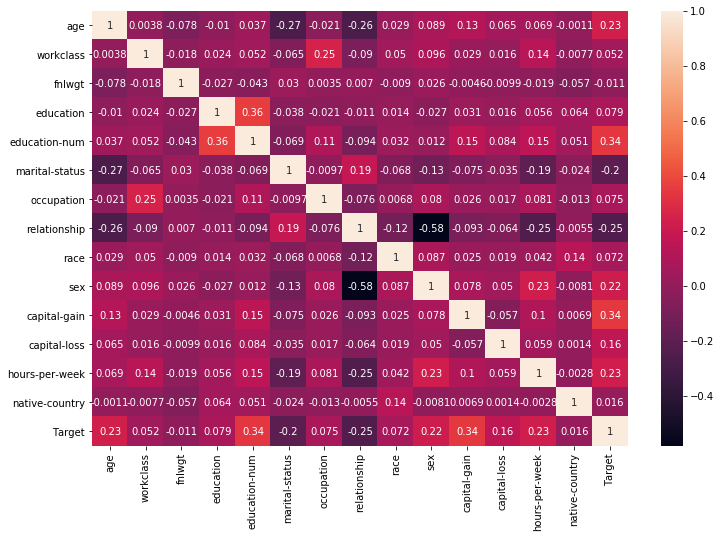

In [10]:
#checking for the correlation
corr_hmap=census_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_hmap,annot=True)

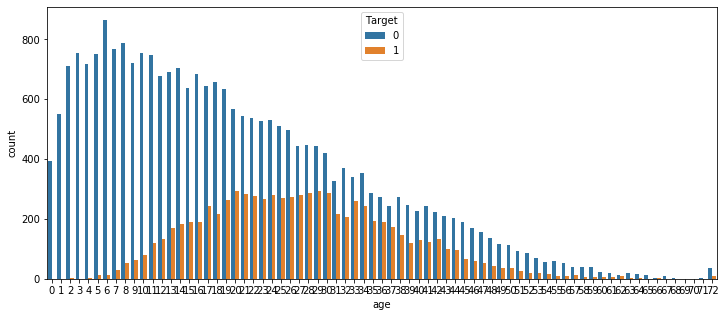

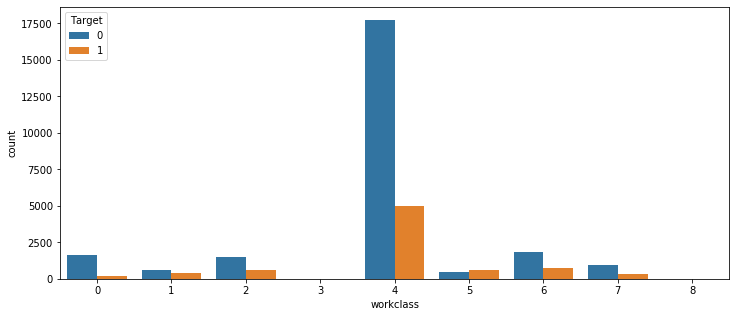

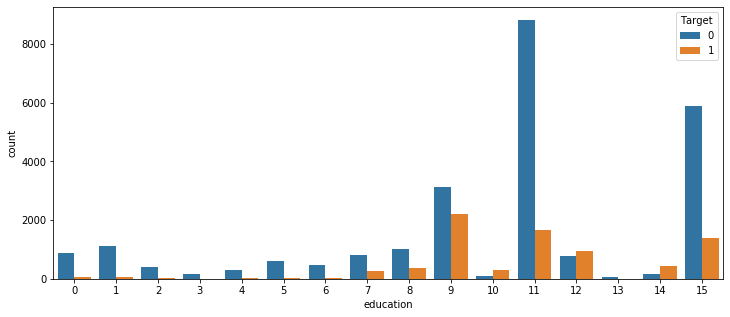

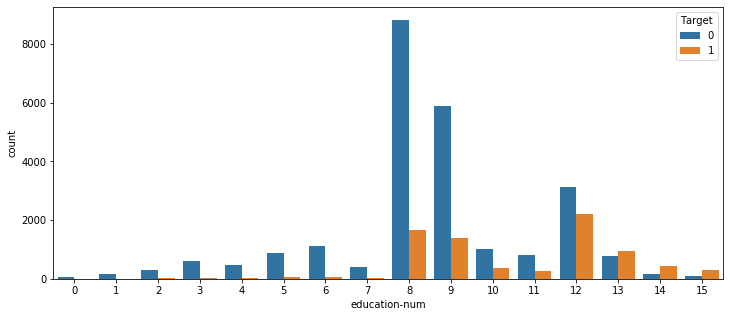

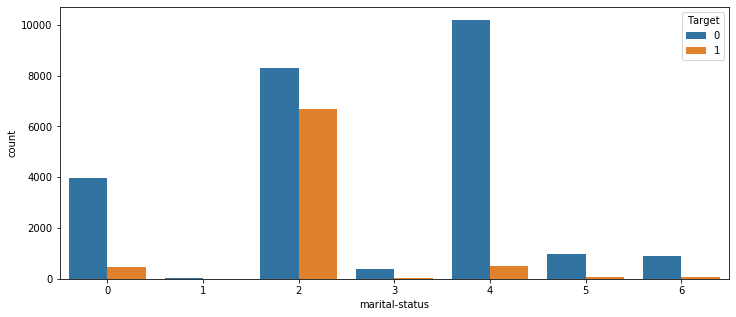

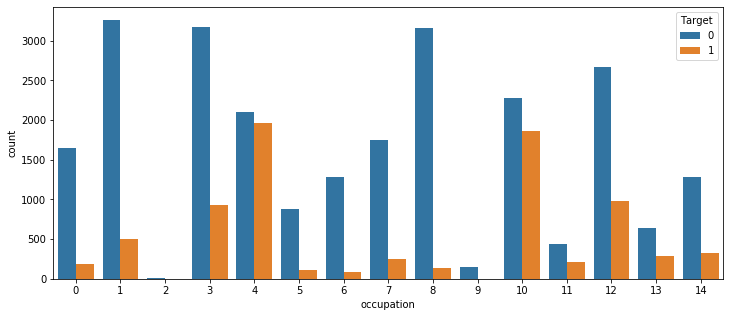

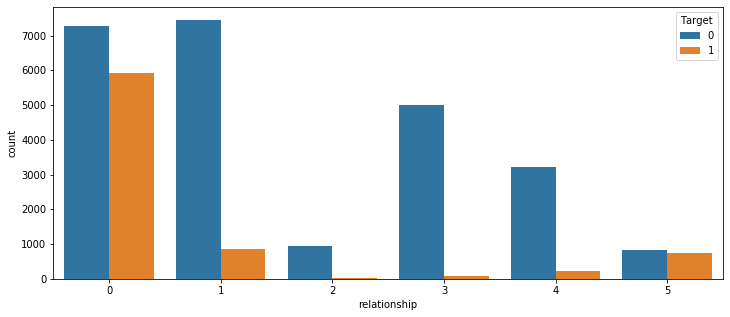

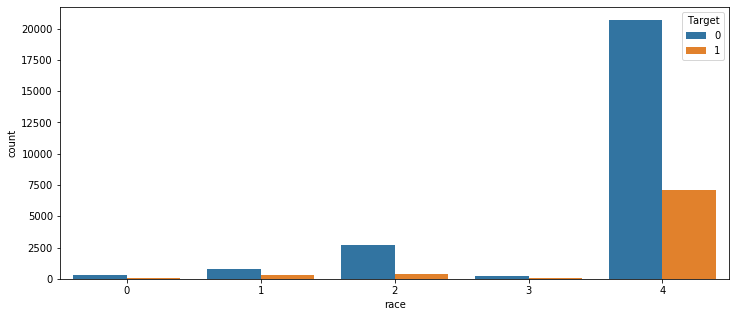

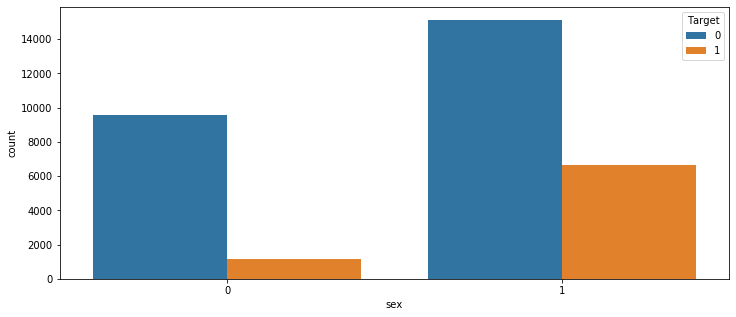

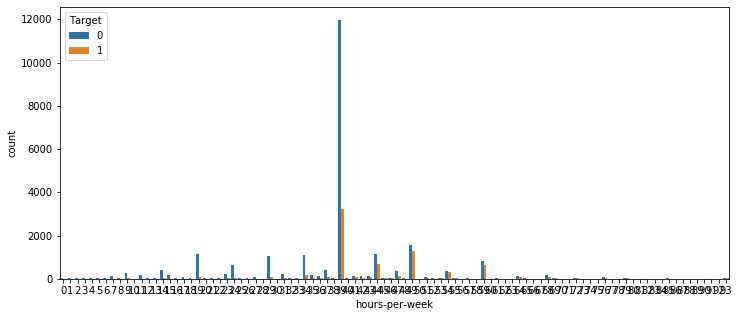

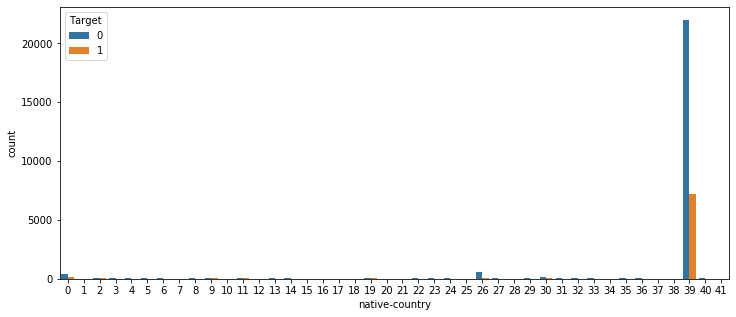

In [11]:
#printing different countplot
data_columns=['age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country',]
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(12,5))
    sns.countplot(data=census_df,x=data_columns[i],hue='Target')

age                  AxesSubplot(0.125,0.799681;0.168478x0.0803191)
workclass         AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
fnlwgt            AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
education         AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
education-num        AxesSubplot(0.125,0.703298;0.168478x0.0803191)
marital-status    AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
occupation        AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
relationship      AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
race                 AxesSubplot(0.125,0.606915;0.168478x0.0803191)
sex               AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
capital-gain      AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
capital-loss      AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
hours-per-week       AxesSubplot(0.125,0.510532;0.168478x0.0803191)
native-country    AxesSubplot(0.327174,0.510532;0.168478x0.0803191)
Target            AxesSubplot(0.529348,0.510532;

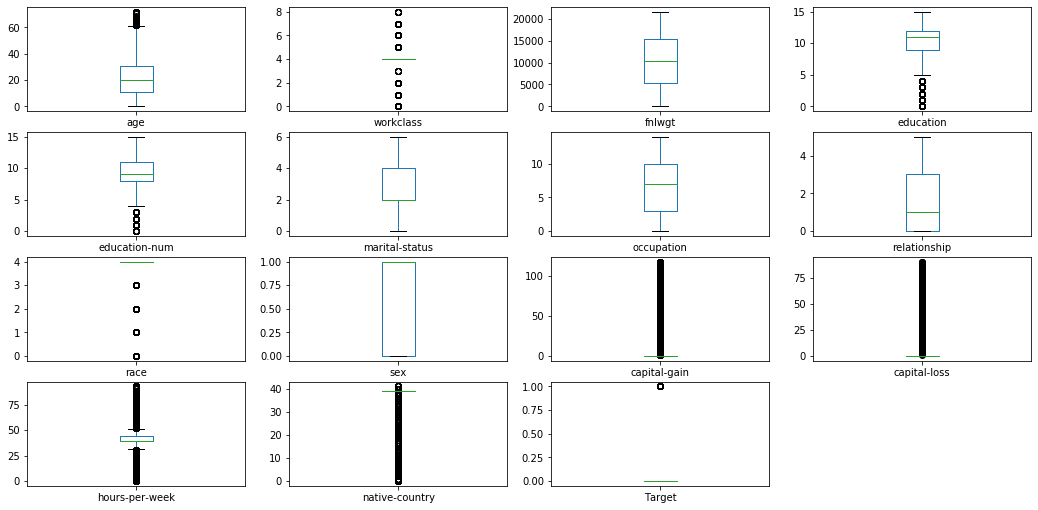

In [12]:
#checking for the outliers
census_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(18,18))

In [13]:
#checking the skewness before removing the outliers
census_df.skew()

age               0.555588
workclass        -0.752024
fnlwgt            0.063101
education        -0.934042
education-num    -0.311676
marital-status   -0.013508
occupation        0.114583
relationship      0.786818
race             -2.435386
sex              -0.719293
capital-gain      3.572079
capital-loss      5.266147
hours-per-week    0.069757
native-country   -3.658303
Target            1.212430
dtype: float64

In [14]:
#removing outliers
z_score=np.abs(zscore(census_df))
print(census_df.shape)
census_df_final=census_df.loc[(z_score<3).all(axis=1)]
print(census_df_final.shape)

(32561, 15)
(26736, 15)


In [15]:
#Now separating input and output variable
x=census_df_final.drop(['Target'],axis=1)
y=census_df_final['Target']
print(x.shape)
print(y.shape)

(26736, 14)
(26736,)


In [16]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.09183944,  2.1695789 , -1.30806736, ..., -0.10845181,
         0.02961929,  0.1979848 ],
       [ 0.91307487,  1.479148  , -1.26592793, ..., -0.10845181,
        -2.39456887,  0.1979848 ],
       [ 0.01718167,  0.09828621,  0.57829209, ..., -0.10845181,
         0.02961929,  0.1979848 ],
       ...,
       [ 0.16649721,  0.09828621, -0.41421556, ..., -0.10845181,
         0.02961929,  0.1979848 ],
       [ 1.510337  ,  0.09828621, -0.44677034, ..., -0.10845181,
         0.02961929,  0.1979848 ],
       [-1.17734259,  0.09828621,  0.3791626 , ..., -0.10845181,
        -1.76607564,  0.1979848 ]])

In [17]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [18]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.8272251308900523
random state:  43  accuracy score:  0.8160059835452506
random state:  44  accuracy score:  0.8302169035153328
random state:  45  accuracy score:  0.8294689603590127
random state:  46  accuracy score:  0.8219895287958116
random state:  47  accuracy score:  0.8294689603590127
random state:  48  accuracy score:  0.8347045624532535
random state:  49  accuracy score:  0.824607329842932
random state:  50  accuracy score:  0.8261032161555721
random state:  51  accuracy score:  0.8219895287958116
random state:  52  accuracy score:  0.8279730740463724
random state:  53  accuracy score:  0.8343305908750935
random state:  54  accuracy score:  0.825355272999252
random state:  55  accuracy score:  0.8380703066566941
random state:  56  accuracy score:  0.8204936424831712
random state:  57  accuracy score:  0.8362004487658938
random state:  58  accuracy score:  0.825355272999252
random state:  59  accuracy score:  0.8238593866866118
random sta

random state:  76  accuracy score:  0.7909498878085266
random state:  77  accuracy score:  0.7430815258040389
random state:  78  accuracy score:  0.7816005983545251
random state:  79  accuracy score:  0.7647718773373223

max accuracy score at random state: 76  for the model  GNB  is:  0.7909498878085266


SVC
random state:  42  accuracy score:  0.8395661929693343
random state:  43  accuracy score:  0.8406881077038145
random state:  44  accuracy score:  0.8492894540014959
random state:  45  accuracy score:  0.8485415108451758
random state:  46  accuracy score:  0.8399401645474944
random state:  47  accuracy score:  0.8466716529543755
random state:  48  accuracy score:  0.8526551982049364
random state:  49  accuracy score:  0.8418100224382947
random state:  50  accuracy score:  0.8444278234854151
random state:  51  accuracy score:  0.8455497382198953
random state:  52  accuracy score:  0.8414360508601346
random state:  53  accuracy score:  0.8470456245325355
random state:  54  accuracy s

In [19]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.8297315786646686
Cross Validation Score(Std):  0.0021817759449332904

Model name:  KNN
Cross Validation Score(Mean):  0.8341787507821623
Cross Validation Score(Std):  0.004838662074967169

Model name:  DT
Cross Validation Score(Mean):  0.8018869043887269
Cross Validation Score(Std):  0.0015326870621233273

Model name:  GNB
Cross Validation Score(Mean):  0.7622395721341427
Cross Validation Score(Std):  0.008432470685632017

Model name:  SVC
Cross Validation Score(Mean):  0.845981374218723
Cross Validation Score(Std):  0.0026237456014698885



In [20]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",84.330591,82.973158
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",84.928945,83.417875
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",81.451010,80.188690
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",79.094989,76.223957
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",85.863874,84.598137


In [21]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,test_size=0.10)
model_name=SVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.8586387434554974
confusion matrix: 
[[2099   85]
 [ 293  197]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2184
           1       0.70      0.40      0.51       490

    accuracy                           0.86      2674
   macro avg       0.79      0.68      0.71      2674
weighted avg       0.84      0.86      0.84      2674

[0 1 0 ... 0 0 0]


In [22]:
#saving the model as pickle in a file
pickle.dump(model_name,open('SVC_census_data.pkl','wb'))

In [23]:
#loading the model for testing
loaded_model=pickle.load(open('SVC_census_data.pkl','rb'))
loaded_model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])